In [135]:
import matplotlib.pyplot as plt
import random
import math

In [21]:
aa_deltaG = { 'A': 1,   # Alanine
             'C': 0.17,  # Cysteine
             'D': -3,    # Aspartic Acid
             'E': -2.6,  # Glutamic Acid
             'F': 2.5,   # Phenylalanine
             'G': 0.67,  # Glycine
             'H': -1.7,  # Histidine
             'I': 3.1,   # Isoleucine
             'K': -4.6,  # Lysine
             'L': 2.2,   # Leucine
             'M': 1.1,   # Methionine
             'N': -2.7,  # Asparagine
             'P': -0.29, # Proline
             'Q': -2.9,  # Glutamine
             'R': -7.5,  # Arginine
             'S': -1.1,  # Serine
             'T': -0.75, # Threonine
             'V': 2.3,   # Valine
             'W': 1.5,   # Tryptophan
             'Y': 0.08 } # Tyrosine

In [154]:
#Problema 1
#protein = "ACDEF..."
#estructura = "INSWWE"
#res = (0,0)=["A","C"], (0,1)="B"
#Asumimos que protein y structure tienen la misma longitud y solo se puede hacer un movimiento por proteina.
def get_spatial_dic(protein, structure): 
    
    #Inicializamos el diccionario que devolveremos si no hay solapamientos
    res = dict()
    
    #Las coordenadas por defecto de inicio son (x,y) = 0,0
    afterCords= [0,0]
    
    #Recorremos la cadena de proteinas
    for i in range (0,len(protein)):
        
        #Si la proteina está en delta entonces y la primera proteía es "I" seguimos, en el caso de que no, paramos
        if(protein[i] in aa_deltaG):
            if(i==0 and structure[i]!="I"):
                return dict()
            
            #Si la proteina es la I, como es el caso inicial suponemos que está en 0,0
            if(structure[i] == "I"):
                res[(0,0)]=protein[i]
                
            #En cualquier otro caso
            else:
                
                #Si la estructura es una N, obtenemos las coordenadas del anterior y le sumamos 1 a la componente "y"
                if(structure[i]=="N"):
                    afterCords= [afterCords[0],afterCords[1]+1]
                    newCords = tuple(afterCords)
                
                #Si la estructura es una N, obtenemos las coordenadas del anterior y le restamos 1 a la componente "y"
                elif(structure[i]=="S"):
                    afterCords= [afterCords[0],afterCords[1]-1]
                    newCords = tuple(afterCords)
                    
                #Si la estructura es una N, obtenemos las coordenadas del anterior y le sumamos 1 a la componente "x"
                elif(structure[i]=="E"):
                    afterCords= [afterCords[0]+1,afterCords[1]]
                    newCords = tuple(afterCords)
                
                #Si la estructura es una N, obtenemos las coordenadas del anterior y le restamos 1 a la componente "x"
                elif(structure[i]=="W"):
                    afterCords= [afterCords[0]-1,afterCords[1]]
                    newCords = tuple(afterCords)
                    
                #En el caso de que las nuevas coordenadas no estén el diccionario las añadimos, en el caso de que estén,
                #Significa que existe solapamiento, por tanto devolvemos uno vacío
                if(newCords not in res):
                    res[newCords]=protein[i]
                else:
                    return dict()
        else:
            return dict()
    return res

        

In [23]:
get_spatial_dic("ACDEF","IWNNN")

{(0, 0): 'A', (-1, 0): 'C', (-1, 1): 'D', (-1, 2): 'E', (-1, 3): 'F'}

In [24]:
# Problema 2.1
# input: aa "aminoacid" ej: "A", "C", "D",
# output: True (hidrophobic) or false (hidrophilic)

def is_hidrofobic(aa):
    hidrophobic_limit = -1.5

    return aa_deltaG[aa] > hidrophobic_limit

In [25]:
print(is_hidrofobic('A'))
print(is_hidrofobic('D'))
print(is_hidrofobic('S'))        

True
False
True


In [26]:
# Problema 2.2
# input: 
#    dic "dictionary that represents 2d structure of the protein" ej: {(0,0): A, (0,1): D ... }
# output: score

def get_N(dic, coords):
    res = 0
    x = coords[0]
    y = coords[1]
    
    if ((x+1, y) not in dic):
        res+=1
    if ((x, y+1) not in dic):
        res+=1
    if ((x-1, y) not in dic):
        res+=1
    if ((x, y-1) not in dic):
        res+=1
        
    return res

def get_score(dic):
    res = 0
    for coords in dic:
        
        aminoacid = dic[coords]
        N = get_N(dic,coords)
        
        res += aa_deltaG[aminoacid] * N
        if is_hidrofobic(aminoacid):
            res += 10 * N
    return res

In [27]:
get_score({(0,0): "A", (0,1): "D"})

24

In [28]:
def get_coords(structure):
     #Si la estructura es una N, obtenemos las coordenadas del anterior y le sumamos 1 a la componente "y"
    afterCords= (0,0)
    coords = list()
    coords.append(afterCords)
    
    #Cambiar
    for i in range (1,len(structure)):
        if(structure[i]=="N"):
            afterCords= [afterCords[0],afterCords[1]+1]
            newCords = tuple(afterCords)

        #Si la estructura es una N, obtenemos las coordenadas del anterior y le restamos 1 a la componente "y"
        elif(structure[i]=="S"):
            afterCords= [afterCords[0],afterCords[1]-1]
            newCords = tuple(afterCords)

        #Si la estructura es una N, obtenemos las coordenadas del anterior y le sumamos 1 a la componente "x"
        elif(structure[i]=="E"):
            afterCords= [afterCords[0]+1,afterCords[1]]
            newCords = tuple(afterCords)

        #Si la estructura es una N, obtenemos las coordenadas del anterior y le restamos 1 a la componente "x"
        elif(structure[i]=="W"):
            afterCords= [afterCords[0]-1,afterCords[1]]
            newCords = tuple(afterCords)
        coords.append(newCords)
    return coords

In [29]:
get_coords("INNW")

[(0, 0), (0, 1), (0, 2), (-1, 2)]

In [30]:
# Ejercicio 3


def fold_backwards(direction):
    if direction == "N":
        return "W"
    elif direction == "W":
        return "S"
    elif direction == "S":
        return "E"
    elif direction == "E":
        return "N"
    else:
        return direction
    
def fold_forwards(direction):
    if direction == "N":
        return "E"
    elif direction == "W":
        return "N"
    elif direction == "S":
        return "W"
    elif direction == "E":
        return "S"
    else:
        return direction
    
def fold(structure, pos, angle):
    coords = get_coords(structure)
    
    res = ""
    folding = False
    for i in range(0, len(coords)):
        coord = coords[i]
        direction = structure[i]
        
        if folding:
            if angle == 90:
                res += fold_backwards(direction)
            if angle == -90:
                res += fold_forwards(direction)
        else:
            res+= direction
            
        if coord == pos:
            folding = True
            
    return res        

In [31]:
fold("INNW", (0,1), 90)

'INWS'

In [32]:
fold("INNW", (0,1), -90)

'INEN'

In [138]:
# Ejercicio 3.2

def get_successors(protein, structure):
    coords = get_coords(structure)
    
    if len(protein) != len(structure):
        return {}
    
    res = {}
    for coord in coords:
        folded_backwards = fold(structure, coord, 90)
        folded_forwards = fold(structure, coord, -90)
        
        backwards_dic = get_spatial_dic(protein, folded_backwards)
        forwards_dic = get_spatial_dic(protein, folded_forwards)
        
        if backwards_dic:
            res[folded_backwards] = backwards_dic
            
        if forwards_dic:
            res[folded_forwards] = forwards_dic
            
    return res

In [228]:
protein = ['L','K','H','R']
structure = ['I','E','E','E']
res = get_successors(protein,structure)
print(res)

{'INNN': {(0, 0): 'L', (0, 1): 'K', (0, 2): 'H', (0, 3): 'R'}, 'ISSS': {(0, 0): 'L', (0, -1): 'K', (0, -2): 'H', (0, -3): 'R'}, 'IENN': {(0, 0): 'L', (1, 0): 'K', (1, 1): 'H', (1, 2): 'R'}, 'IESS': {(0, 0): 'L', (1, 0): 'K', (1, -1): 'H', (1, -2): 'R'}, 'IEEN': {(0, 0): 'L', (1, 0): 'K', (2, 0): 'H', (2, 1): 'R'}, 'IEES': {(0, 0): 'L', (1, 0): 'K', (2, 0): 'H', (2, -1): 'R'}, 'IEEE': {(0, 0): 'L', (1, 0): 'K', (2, 0): 'H', (3, 0): 'R'}}


In [139]:
get_successors("ADADDDD", "INWSWNE")

{'INWSSWN': {(0, 0): 'A',
  (0, 1): 'D',
  (-1, 1): 'A',
  (-1, 0): 'D',
  (-1, -1): 'D',
  (-2, -1): 'D',
  (-2, 0): 'D'},
 'INWSWWN': {(0, 0): 'A',
  (0, 1): 'D',
  (-1, 1): 'A',
  (-1, 0): 'D',
  (-2, 0): 'D',
  (-3, 0): 'D',
  (-3, 1): 'D'},
 'INWSWNN': {(0, 0): 'A',
  (0, 1): 'D',
  (-1, 1): 'A',
  (-1, 0): 'D',
  (-2, 0): 'D',
  (-2, 1): 'D',
  (-2, 2): 'D'}}

In [223]:
# Ejercicio 4

def simmulating_annealing(protein):
    T_0 = 50
    L = 150
    T_f = 0.5
    
    T = T_0
    actual_structure = "I" + "N" * (len(protein) - 1)
    actual_score = 0
    
    while T >= T_f:
        
        for i in range(1,L+1):
            candidate_structure_dic = get_successors(protein, actual_structure)
            x = random.randint(0, len(candidate_structure_dic)-1)
            keys = list(candidate_structure_dic.keys())
            candidate_structure = keys[x]
            
            candidate_dic = get_spatial_dic(protein, candidate_structure)
            actual_dic = get_spatial_dic(protein, actual_structure)
            actual_score = get_score(actual_dic)
            candidate_score = get_score(candidate_dic)
            delta = candidate_score - actual_score
            
            if random.random() < math.pow(math.e, -delta/T) or delta < 0:
                actual_structure = candidate_structure
        
        print("Score: " + str(actual_score))
        print(T)
        T = T / 2
        
    return actual_structure

In [360]:
def simmulating_annealing_with_graphs(protein):
    T_0 = 200
    L = 150
    T_f = 0.5
    
    T = T_0
    actual_structure = "I" + "N" * (len(protein) - 1)
    actual_score = 0
    
    #FIREWALL
    last_score = 0
    same_score_iterations = 0 
    
    #GRAPH
    plt_score_it = 0
    plt_temp_it = 1
    plt_score = []
    plt_temp = [T_0]
    
    while T >= T_f:
        
        for i in range(1,L+1):
            
            candidate_structure_dic = get_successors(protein, actual_structure)
            x = random.randint(0, len(candidate_structure_dic)-1)
            keys = list(candidate_structure_dic.keys())
            candidate_structure = keys[x]
            
            candidate_dic = get_spatial_dic(protein, candidate_structure)
            actual_dic = get_spatial_dic(protein, actual_structure)
            actual_score = get_score(actual_dic)
            candidate_score = get_score(candidate_dic)
            delta = candidate_score - actual_score
            
            if random.random() < math.pow(math.e, -delta/T) or delta < 0:
                actual_structure = candidate_structure
            
            #FIREWALL
            if last_score-2 < actual_score or actual_score > last_score+2:
                same_score_iterations += 1
            else:
                same_score_iterations = 0
            
            # break
            if same_score_iterations > L:
                T = T_f
                
            last_score = actual_score
            
            #GRAPH
            plt_score.append(actual_score)
            plt_score_it+=1
            
        print("Score: " + str(actual_score))
        print("Temperature: " + str(T))
        T = T / 2
        
        #GRAPH
        plt_temp.append(T)
        plt_temp_it+=1
    
    #GRAPH
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,7))
    ax1.title.set_text("Score")
    ax1.plot(range(0, plt_score_it) , plt_score, "blue")
    ax2.title.set_text("Temperature")
    ax2.plot(range(0, plt_temp_it), plt_temp, "orange")
    
    return actual_structure

Score: 178.20999999999998
Temperature: 200
Score: 176.58
Temperature: 100.0
Score: 157.20999999999998
Temperature: 50.0
Score: 116.40999999999998
Temperature: 25.0
Score: 135.54000000000002
Temperature: 12.5
Score: 82.94
Temperature: 6.25
Score: 82.94
Temperature: 0.5
IWWNENESENNWNWS
{(0, 0): 'A', (-1, 0): 'C', (-2, 0): 'D', (-2, 1): 'E', (-1, 1): 'A', (-1, 2): 'F', (0, 2): 'S', (0, 1): 'D', (1, 1): 'S', (1, 2): 'G', (1, 3): 'F', (0, 3): 'L', (0, 4): 'K', (-1, 4): 'Q', (-1, 3): 'A'}


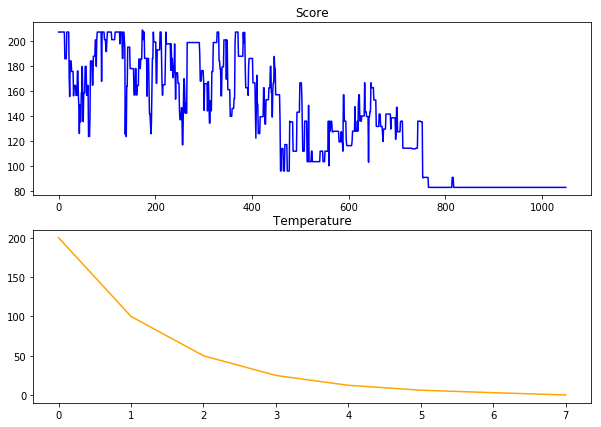

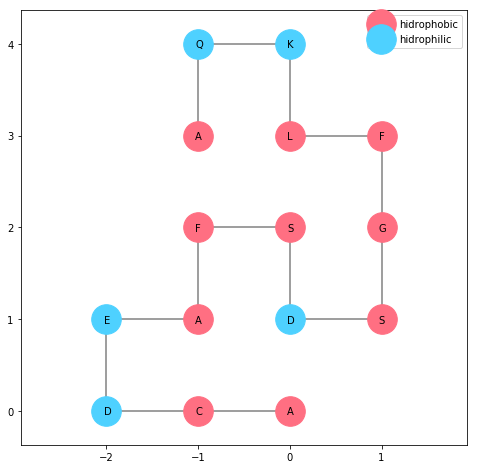

In [361]:
# ("ACDEAFSDSGFLKQA", "INNWSWNNNEENESE")

structure = simmulating_annealing_with_graphs("ACDEAFSDSGFLKQA")
print(structure)

spatial_dic = get_spatial_dic("ACDEAFSDSGFLKQA",
                              structure)
print(spatial_dic)
draw_protein(spatial_dic)

Score: 1380.4800000000005
Temperature: 200
Score: 1164.45
Temperature: 100.0
Score: 1038.9699999999996
Temperature: 50.0
Score: 962.0499999999997
Temperature: 25.0
Score: 854.2099999999998
Temperature: 12.5
Score: 703.52
Temperature: 6.25
Score: 633.0400000000003
Temperature: 3.125
Score: 609.7400000000002
Temperature: 0.5
ISSSESEENNWWNNESEEEEESWWWSSESEENNENNENNNESSSSSWSWSSWSESEENWNNESEESSWSWWSWNWSSWWNENNWSWSSSSENESEEENWNEENESSSWSW


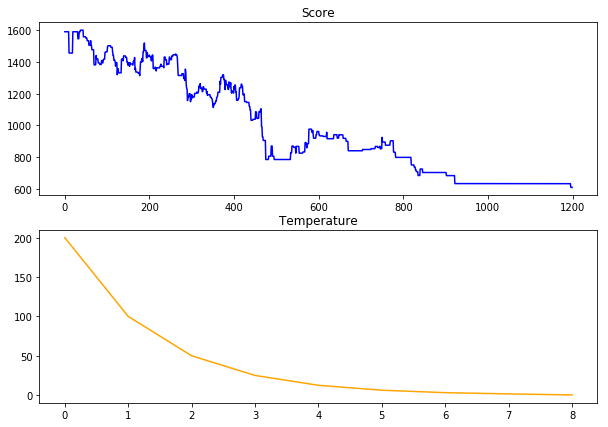

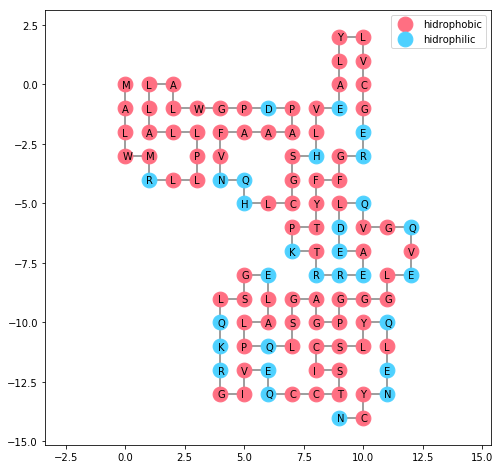

In [362]:
# Ejemplo 2
insulin = 'MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN'

structure = simmulating_annealing_with_graphs(insulin)
print(structure)

spatial_dic = get_spatial_dic(insulin,
                              structure)

draw_protein(spatial_dic)

In [213]:
# Ejemplo 1
proteinaCorreo = "MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV"
estructuraCorreo = "ISWNWWNNWNWNEESESSENENNNWSWNWNWSWNWSSSWNNWNENNENWNWSWSESWWNNNNNEENWNNESEESWSSENEEESWWSEESWSESESENNESSENNNNNWSWNWNEENWWWNWSWNNNESENNNWSWNNEEESSSENESSWSEENEESSENNNWWNWNENESSENESSEEESWWWSSEENESSWWSESSENNESENNENESSWSSESESWWNWNWSWWWSWWWSEESENENESENESSWWWSWWSSSSSESENNWNNNEEESWWSESSENNESSSENENWNNWNENNNESENENNNESSSSSWN"

structure = simmulating_annealing(proteinaCorreo)
print(structure)

spatial_dic = get_spatial_dic(proteinaCorreo,
                              structure)

print(spatial_dic)
draw_protein(spatial_dic)

Score: 4580.720000000005
100
Score: 4192.050000000001
66.66666666666667
Score: 3635.9700000000016
44.44444444444445
Score: 3044.2000000000003
29.629629629629633
Score: 2738.0100000000007
19.75308641975309
Score: 2709.48
13.168724279835393
Score: 2680.5699999999993
8.779149519890263
Score: 2475.339999999999
5.8527663465935085
Score: 2444.0299999999993
3.901844231062339
Score: 2444.0299999999993
2.601229487374893
Score: 2444.0299999999993
1.7341529915832619
Score: 2444.0299999999993
1.1561019943888413
Score: 2440.139999999999
0.7707346629258942
Score: 2438.629999999999
0.5138231086172628
Score: 2438.629999999999
0.3425487390781752
Score: 2435.439999999999
0.22836582605211678
Score: 2435.439999999999
0.1522438840347445
Score: 2435.439999999999
0.10149592268982967
IEENWNENWWSSWNWNNEENNWNEENEENWWWWWSSSSWWNNNENNEEEEEEEENNNNNNNWSSSWSWSESWWWWWWNEENNWSWNWSSWNWSWSEEESWWSWWWSEESWWWWSEEESWWWSEEEEEESWWWWWSWNWNWWNENWWSSSSSWWSSSWNNNNEENWNENNWWWSSSWWNNNNEEENWWWWSWWSSSSWWWWWWSESSENEEENESSSENNNNNESSEEES

TypeError: string indices must be integers

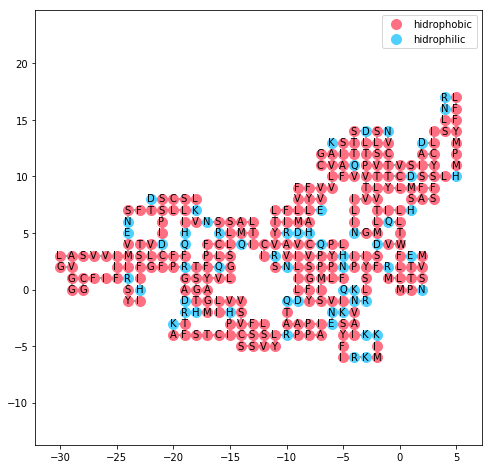

In [294]:
spatial_dic = get_spatial_dic("MPNSTTVMEFLLMRFSDVWTLQILHSASFFMLYLVTLMGNILIVTVTTCDSSLHMPMYFFLRNLSILDACYISVTVPTSCVNSLLDSTTISKAGCVAQVFLVVFFVYVELLFLTIMAHDRYVAVCQPLHYPVIVNSRICIQMTLASLLSGLVYAGMHTGSTFQLPFCRSNVIHQFFCDIPSLLKLSCSDTFSNEVMIVVSALGVGGGCFIFIIRSYIHIFSTVLGFPRGADRTKAFSTCIPHILVVSVFLSSCSSVYLRPPAIPAATQDLILSGFYSIMPPLFNPIIYSLRNKQIKVAIKKIMKRIFYSENV",
                              "IEENWNENWWSSWNWNNEENNWNEENEENWWWWWSSSSWWNNNENNEEEEEEEENNNNNNNWSSSWSWSESWWWWWWNEENNWSWNWSSWNWSWSEEESWWSWWWSEESWWWWSEEESWWWSEEEEEESWWWWWSWNWNWWNENWWSSSSSWWSSSWNNNNEENWNENNWWWSSSWWNNNNEEENWWWWSWWSSSSWWWWWWSESSENEEENESSSENNNNNESSEEESSSSSWSEEEEENNWNEESSEESWWSEEENEEEENWWWNNENNNESSSENNNESENENESSSSWNWSSESSEESSWWWNNNWNN")
draw_protein(spatial_dic)

In [ ]:
get_spatial_dic("ACDEAFSDSGFLKQA", 'IWWWWWWWWWWWWWW')

In [290]:
# Ejercicio 5.2

def sort_hidrophobic_coords(spatial_dic):
    res = {"hidrophobic": [], "hidrophilic": []}
    
    for coord in spatial_dic:
        aminoacid = spatial_dic[coord]
        
        if is_hidrofobic(aminoacid):
            res["hidrophobic"].append(coord)
        else:
            res["hidrophilic"].append(coord)
        
    return res

def draw_protein(spatial_dic):
    coords = spatial_dic.keys()
    coords_sorted = sort_hidrophobic_coords(spatial_dic)

    fig = plt.figure(figsize=(8, 8))
    
    # LINES
    x, y = zip(*coords)
    plt.plot(x, y, "grey", zorder=0)
    
    x_diff = abs( min(x) - max(x) )
    y_diff = abs( min(y) - max(y) )
    thickness = max(x_diff, y_diff)**(-1) * 3500
    
    # HIDROPHOBIC
    x_1, y_1 = zip(*coords_sorted["hidrophobic"])
    plt.scatter(x_1, y_1, thickness, color="#FF6F82", label="hidrophobic")
    
    # HIDROPHILIC
    x_2, y_2 = zip(*coords_sorted["hidrophilic"])
    plt.scatter(x_2, y_2, thickness, color="#4ED1FF", label="hidrophilic")
    
    # LETTERS

    
    x_shift = 0.01 * x_diff
    y_shift = 0.01 * y_diff
    for coord in coords:
        aminoacid = spatial_dic[coord]
        
        x = coord[0] - x_shift
        y = coord[1] - y_shift
        plt.annotate(aminoacid, xy=(x,y), xytext=(x,y))

    plt.axis("equal")
    plt.legend()
    plt.show()

In [291]:
spatial_dic = get_spatial_dic("ACDEAF","INNWSW")
sort_hidrophobic_coords(spatial_dic)

{'hidrophobic': [(0, 0), (0, 1), (-1, 1), (-2, 1)],
 'hidrophilic': [(0, 2), (-1, 2)]}

{(0, 0): 'A', (0, 1): 'C', (0, 2): 'D', (-1, 2): 'E', (-1, 1): 'A', (-2, 1): 'F', (-2, 2): 'S', (-2, 3): 'D', (-2, 4): 'S', (-1, 4): 'G', (0, 4): 'F', (0, 5): 'L', (1, 5): 'K', (1, 4): 'Q', (2, 4): 'A'}


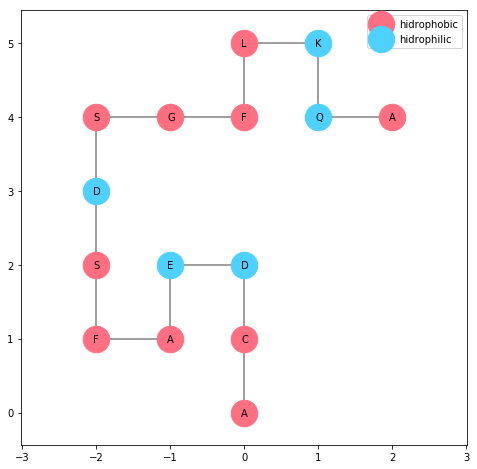

In [292]:
spatial_dic = get_spatial_dic("ACDEAFSDSGFLKQA",
                              "INNWSWNNNEENESE")
print(spatial_dic)
draw_protein(spatial_dic)

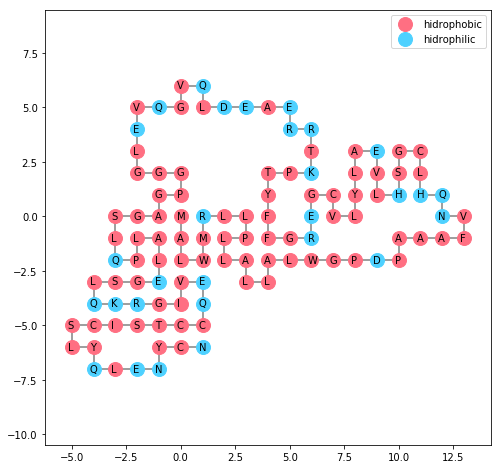

In [293]:
spatial_dic = get_spatial_dic("MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN",
                              "ISSENNEESWSESENEEEEEENEEENWNWNNWSSWNNWSSSWNWSSWWNNNEENNWNWWWWNWSWWSSSEESWSWWSSENESSWWWSEEEENESSWWWWWWSESEEENEE")
draw_protein(spatial_dic)